In [1]:
!ls phystech/data

contest_input.json  readme_solution_1.json  simple_solution.json
hard_input.json     readme_solution_2.json
readme_input.json   simple_input.json


In [2]:
import matplotlib.pyplot as plt
import json
from pprint import pprint
import numpy as np

with open('phystech/data/contest_input.json', 'r') as f:
    data = json.loads(f.read())
    
pprint(data['orders'][:10])

[{'dropoff_from': 600,
  'dropoff_location_x': 252,
  'dropoff_location_y': 197,
  'dropoff_point_id': 60001,
  'dropoff_to': 960,
  'order_id': 10001,
  'payment': 313,
  'pickup_from': 480,
  'pickup_location_x': 284,
  'pickup_location_y': 235,
  'pickup_point_id': 40001,
  'pickup_to': 570},
 {'dropoff_from': 630,
  'dropoff_location_x': 24,
  'dropoff_location_y': 105,
  'dropoff_point_id': 60002,
  'dropoff_to': 660,
  'order_id': 10002,
  'payment': 519,
  'pickup_from': 420,
  'pickup_location_x': 244,
  'pickup_location_y': 262,
  'pickup_point_id': 40002,
  'pickup_to': 450},
 {'dropoff_from': 1050,
  'dropoff_location_x': 115,
  'dropoff_location_y': 38,
  'dropoff_point_id': 60003,
  'dropoff_to': 1080,
  'order_id': 10003,
  'payment': 380,
  'pickup_from': 390,
  'pickup_location_x': 225,
  'pickup_location_y': 141,
  'pickup_point_id': 40003,
  'pickup_to': 1020},
 {'dropoff_from': 420,
  'dropoff_location_x': 236,
  'dropoff_location_y': 165,
  'dropoff_point_id': 60004

In [3]:
np.mean([10 + abs(o['pickup_location_x'] - o['dropoff_location_x'])
           + abs(o['pickup_location_y'] - o['dropoff_location_y'])for o in data['orders']])

152.89935642886485

In [4]:
np.std([10 + abs(o['pickup_location_x'] - o['dropoff_location_x'])
           + abs(o['pickup_location_y'] - o['dropoff_location_y'])for o in data['orders']])

87.85667861893523

In [5]:
np.mean([o['pickup_to'] - o['pickup_from'] for o in data['orders']])

265.7533890182117

In [6]:
np.std([o['pickup_to'] - o['pickup_from'] for o in data['orders']])

223.75382801561025

In [7]:
np.mean([o['dropoff_to'] - o['dropoff_from'] for o in data['orders']])

146.91565110228674

In [8]:
np.std([o['dropoff_to'] - o['dropoff_from'] for o in data['orders']])

95.94721468118411

In [9]:
data['orders'][709]

{'order_id': 10710,
 'pickup_point_id': 40710,
 'pickup_from': 420,
 'pickup_to': 450,
 'pickup_location_x': 331,
 'pickup_location_y': 6,
 'dropoff_point_id': 60710,
 'dropoff_from': 1219,
 'dropoff_to': 540,
 'dropoff_location_x': 311,
 'dropoff_location_y': 150,
 'payment': 520}

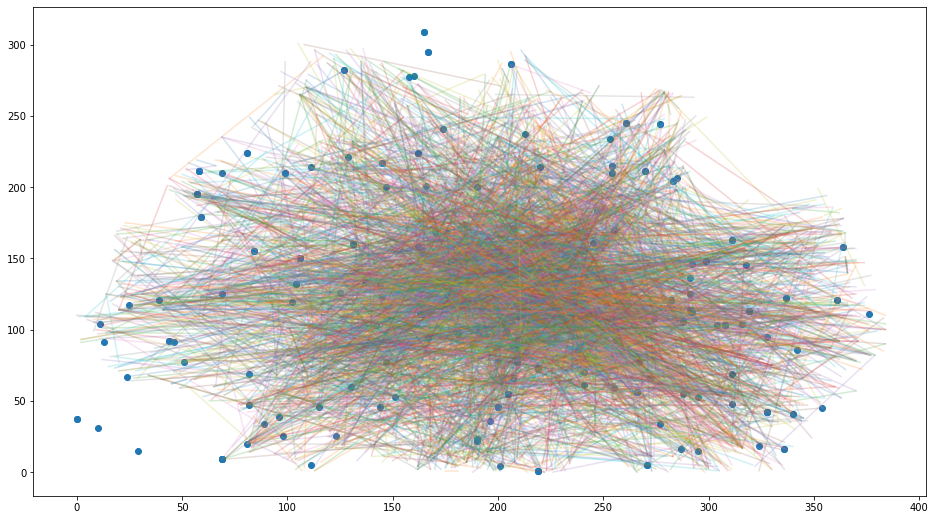

In [10]:
from tqdm import tqdm_notebook

plt.figure(figsize=(16, 9))

s = 0

for i, o in tqdm_notebook(enumerate(data['orders'])):
    #if 500 < i < 600:
    #    break
    
    if not o['pickup_from'] < 500 < o['pickup_to']:
        continue
    s += 1
    
    plt.plot([o['pickup_location_x'], o['dropoff_location_x']],
             [o['pickup_location_y'], o['dropoff_location_y']], alpha=0.2)
    

plt.scatter([c['location_x'] for c in data['couriers']],
            [c['location_y'] for c in data['couriers']])

In [11]:
s

4040

In [12]:
pprint(data.keys())
pprint(data['couriers'][:5])
pprint(data['depots'][:5])
pprint(data['orders'][:5])

dict_keys(['couriers', 'depots', 'orders'])
[{'courier_id': 1, 'location_x': 111, 'location_y': 5},
 {'courier_id': 2, 'location_x': 260, 'location_y': 112},
 {'courier_id': 3, 'location_x': 207, 'location_y': 66},
 {'courier_id': 4, 'location_x': 288, 'location_y': 55},
 {'courier_id': 5, 'location_x': 253, 'location_y': 234}]
[{'location_x': 241, 'location_y': 109, 'point_id': 30001},
 {'location_x': 188, 'location_y': 134, 'point_id': 30002},
 {'location_x': 204, 'location_y': 99, 'point_id': 30003},
 {'location_x': 241, 'location_y': 155, 'point_id': 30004},
 {'location_x': 223, 'location_y': 105, 'point_id': 30005}]
[{'dropoff_from': 600,
  'dropoff_location_x': 252,
  'dropoff_location_y': 197,
  'dropoff_point_id': 60001,
  'dropoff_to': 960,
  'order_id': 10001,
  'payment': 313,
  'pickup_from': 480,
  'pickup_location_x': 284,
  'pickup_location_y': 235,
  'pickup_point_id': 40001,
  'pickup_to': 570},
 {'dropoff_from': 630,
  'dropoff_location_x': 24,
  'dropoff_location_y':

courier_id location_x location_y

In [13]:
data['orders'] = [o for o in data['orders'] if o['dropoff_to'] - o['dropoff_from'] > 0]

In [14]:
s = ''
for category in sorted(data.keys()):
    t = ''
    t += str(len(data[category])) + '\n'
    for j in data[category]:
        t += ' '.join([str(j[k]) for k in sorted(data[category][0].keys())])
        t += '\n'
                 
    s += t
s = s[:-1]

In [15]:
with open('data.txt', 'w') as f:
    f.write(s)

In [16]:
sorted(data.keys())

['couriers', 'depots', 'orders']

In [17]:
sorted(data['orders'][0].keys())

['dropoff_from',
 'dropoff_location_x',
 'dropoff_location_y',
 'dropoff_point_id',
 'dropoff_to',
 'order_id',
 'payment',
 'pickup_from',
 'pickup_location_x',
 'pickup_location_y',
 'pickup_point_id',
 'pickup_to']

In [18]:
for i in ['dropoff_from',
 'dropoff_location_x',
 'dropoff_location_y',
 'dropoff_point_id',
 'dropoff_to',
 'order_id',
 'payment',
 'pickup_from',
 'pickup_location_x',
 'pickup_location_y',
 'pickup_point_id',
 'pickup_to']:
    print(f'>> order.{i}', end=' ')

>> order.dropoff_from >> order.dropoff_location_x >> order.dropoff_location_y >> order.dropoff_point_id >> order.dropoff_to >> order.order_id >> order.payment >> order.pickup_from >> order.pickup_location_x >> order.pickup_location_y >> order.pickup_point_id >> order.pickup_to 

In [26]:
import igraph
from igraph import Graph, EdgeSeq
nr_vertices = 25
v_label = list(map(str, range(nr_vertices)))
G = Graph.Tree(nr_vertices, 2) # 2 stands for children number
lay = G.layout('rt')

print(np.array(lay))
position = {k: lay[k] for k in range(nr_vertices)}
Y = [lay[k][1] for k in range(nr_vertices)]
M = max(Y)

es = EdgeSeq(G) # sequence of edges
E = [e.tuple for e in G.es] # list of edges

L = len(position)
Xn = [position[k][0] for k in range(L)]
Yn = [2*M-position[k][1] for k in range(L)]
Xe = []
Ye = []
for edge in E:
    Xe+=[position[edge[0]][0],position[edge[1]][0], None]
    Ye+=[2*M-position[edge[0]][1],2*M-position[edge[1]][1], None] 

labels = v_label


[[-4.375  3.   ]
 [-2.625  2.   ]
 [-4.375  4.   ]
 [-1.     1.   ]
 [-0.875  3.   ]
 [-5.375  5.   ]
 [-3.375  5.   ]
 [ 0.     0.   ]
 [ 0.625  2.   ]
 [-1.875  4.   ]
 [ 0.125  4.   ]
 [-5.875  6.   ]
 [-4.875  6.   ]
 [-3.875  6.   ]
 [-2.875  6.   ]
 [ 0.     1.   ]
 [ 1.     1.   ]
 [ 0.125  3.   ]
 [ 1.125  3.   ]
 [-2.375  5.   ]
 [-1.375  5.   ]
 [-0.375  5.   ]
 [ 0.625  5.   ]
 [-6.375  7.   ]
 [-5.375  7.   ]]


In [22]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=Xe,
                   y=Ye,
                   mode='lines',
                   line=dict(color='rgb(210,210,210)', width=1),
                   hoverinfo='none'
                   ))
fig.add_trace(go.Scatter(x=Xn,
                  y=Yn,
                  mode='markers',
                  name='bla',
                  marker=dict(symbol='circle-dot',
                                size=18, 
                                color='#6175c1',    #'#DB4551', 
                                line=dict(color='rgb(50,50,50)', width=1)
                                ),
                  text=labels,
                  hoverinfo='text',
                  opacity=0.8
                  ))